# SparkCognition 
### Introduction:
In this assignment, I am going to build a model to predict whether a customer will respond to the marketing campaign based on the training dataset. I'll use the model to predict the customer responses using the features provided in the test dataset.

In the training dataset, there are 7414 samples and 21 predictor feature. The target variable "responded" has two values, "yes" and "no". Thus, this project is a binary classification problem. In the exploratory analysis, the 21 predictors were separated into three categories: personal, bank activity ,and macro-economic data, and their statistics were examined to get some intuitive between the predictors and target. 

In the data selection, the three highly correlated variables were dropped to improve the model (linear models) stability. The categorical features were converted to numerical data as the input for the model training. Before model training, the number of samples in the minority class was balanced using Synthetic Minority Oversampling Technique.

Three different algorithms were adopted for model training, logistic regression, random forest, and gradient boosting tree (XGboost). The model performance was evaluated based on the ROC_AUC score. The random forest and gradient boosting tree models' average performance were similar with ROC_AUC score near 0.8, but on the class responded with 'Yes' value, the gradient boosting tree model is slightly better. In the three models, the model performance was not so great in class responded with 'Yes'. The best recall score is only 0.23, which means only 23% of potential customers were correctly predicted, even though the weighted average recall is 0.88. There's still some potential to fine-tune the model to increase the prediction result in class 'Yes'. 

The top important factors of predicting customer response are also identified based on the importance analysis. The strong indicators of the customer response are previous campaign outcome, previous contact, macro-economic, campaign month, and contact type.".

The assignment was intended to build a model that can be used to create some useful results rather than to obtain the finest model. To improve the prediction results, some experiments are worth testing:
1. Feature engineering to extract useful information from current predictors. 
2. Test class weight parameters to improve the results in class responded "Yes".
3. Other models can also be tested, for example, Neural network.


### Deliverables:
Provide the following: 
1. **The source code you used to build the model and make predictions.** <br>
    The source code would be provided following the introduction and discussion.<br>
    
    
2.  **A .csv file containing the predictions of the test data. You can add the target column (‘responded’) to the test data or simply provide it alone with the ‘id’ column.** <br>
    The .csv file is sent along with this report by email.<br>
    
    
3. **Briefly answer the following questions:** <br> 
    a. **Describe your model and why did you choose this model over other types of models?** <br>
    I choose the gradient boosting tree model as the final model to predict based on the test data. The gradient boosting tree model is tree-based model and was build based on an ensemble of many individual trees. Each tree estimator was built sequentially that the next tree was build to minimize the residual after the current tree. The model and residual was updated with a weighted factor after each step. <br>
    In this assignment, the gradient boosting tree provided the best score in both training and validation data. The way gradient boosting tree builds its final model was able to extract useful information from the weak predictors. Though a lot of the time, the training of gradient boosting tree model is slow. The data size is small in this case, thus the training cost is not an issue. <br>
    
    b. **Describe any other models you have tried and why do you think this model preforms better?** <br>
    I have tried another two models, logistic regression and random forest. The logistic regression training is pretty fast, but the result score is the lowest among the three. logistic regression is more stable than tree based, but the trade off is the accuracy is not as good as the tree based model in this case. The predictors in the training dataset also have a lot of missing or unknown value which may cause problems in linear regression models but not in tree based models. <br>
    
    The random forest model actually provided very close result as the gradient boosting tree model. Both are tree based models, but in random forest, the trees are built simultaneously with subsample of the training sample and predictors, while the trees are built sequentially to target minimizing the residuals. Usually, the gradient boosting tree result in training dataset is better, but likely overfitting. Proper parameter tunning is needed to avoid the problem. In the end, in class responded "yes", the gradient boosting tree result is slightly better.
    
    c. **How did you handle missing data?** <br>
    In both train and test datasets, three features contain missing data: custAge, schooling, and day_of_week. Among these three features, custAge is a numeric feature, while schooling and day_of_week are categorical features. By plotting the statistics of the custAge, I did not observe a strong relationship between the feature and the target value, thus it's acceptable to impute the missing data with the median value of custAge, which is 38. For the categorical features with missing data, I replaced the missing data with an additional category "missing_value", which is similar to the "unknown" value in those features. <br>
    
    d. **How did you handle categorical (string) data?** <br>
    I used one-hot-encoding to convert categorical data to numerical data which can be used in machine learning algorithms. In this assignment, almost all categorical data has no specific order related to the categorical values, thus it's reasonable to use one-hot-encoding. If there's inherent order associated with values in the categorical feature, label encoding may be used. 
    
    e. **How did you handle unbalanced data?** <br>
    In this assignment, the number of data with target value 0 is about 8 times the data with target value 1. I used oversampling based on Synthetic Minority Oversampling Technique (SMOTE). A random example from the minority class is first chosen. Then k of the nearest neighbors for that example are found (typically k=5). A randomly selected neighbor is chosen and a synthetic example is created at a randomly selected point between the two examples in feature space.
    
    f. **How did you test your model?** <br>
    The training data was split into two parts: training and validation with a ratio of 8:2. The models are training using K-fold methods to avoid overfitting. The parameters were tuned based on grid search or a Bayesian-based hyper-parameter tunning method. The ROC AUC score was used to evaluate the model since the imbalance of the sample numbers in a different class.

## Source Code
###### Table of contents
1. [Import Library](#library)
2. [Read Data](#data)
3. [Exploratory Data Analysis](#eda)
    1. [Check Missing Data](#missingdata)
    2. [Plot The Statistics of Features](#statisticsfeature)
4. [Feature Selection and Engineering](#featureengineering)
    1. [Feature Correlation](#correlation)
    2. [Impute Missing Data](#impute)
    3. [Feature Engineering](#fe)
    4. [Feature Scaling ](#featurescaling)
    5. [Train/Test Data Split](#split)
    6. [Oversampling](#oversampling)
5. [Modeling](#Modeling)
    1. [Linear logistic regression with SGD](#logistic)
    2. [Random Forest](#rf)
    3. [Gradient Boosting Tree](#xgboost)
6. [Model Selection](#models)
7. [Prediction](#prediction)
8. [Future Wrok](#future)

## 1. Import Libraries<a name="library"></a>

In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
import time
from collections import Counter

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, make_scorer, roc_auc_score,accuracy_score, roc_curve
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import classification_report

from imblearn.over_sampling import SMOTE

import xgboost as xgb


from hyperopt import hp
from hyperopt import fmin, tpe, hp, STATUS_OK, Trials

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## 2. Read Data<a name="data"></a>

In [3]:
#import the training and test dataset
train_file = '../../../01_Data/12_sparkCognition/marketing_training.csv'
test_file = '../../../01_Data/12_sparkCognition/marketing_test.csv'
df_train = pd.read_csv(train_file)
df_test = pd.read_csv(test_file)

In [9]:
#training data size
df_train.shape

(7414, 22)

In [10]:
#test data size
df_test.shape

(824, 22)

In [11]:
#check if the predictor features in training and test datasets are consistent
test_col_diff = set(df_test.columns) - set(df_train.columns)
train_col_diff = set(df_train.columns) - set(df_test.columns)
print('Different columns found in train: %s'%(train_col_diff))
print('Different columns found in test: %s'%(test_col_diff))

Different columns found in train: {'responded'}
Different columns found in test: {'Unnamed: 0'}


In [17]:
#create a dataset with the predictors only
df_train_feature = df_train.drop(['responded'], axis = 1)
df_test_feature = df_test.drop(['Unnamed: 0'], axis = 1)

### Read Data Comments:
The training dataset and test dataset features are consistent, and both contain 21 features. The training dataset includes the target variable "responded", while the test dataset includes "ID".

## 3. Exploratory Data Analysis<a name="eda"></a>

### A. Check missing data<a name="missingdata"></a>

In [12]:
# check feature type
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7414 entries, 0 to 7413
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   custAge         5610 non-null   float64
 1   profession      7414 non-null   object 
 2   marital         7414 non-null   object 
 3   schooling       5259 non-null   object 
 4   default         7414 non-null   object 
 5   housing         7414 non-null   object 
 6   loan            7414 non-null   object 
 7   contact         7414 non-null   object 
 8   month           7414 non-null   object 
 9   day_of_week     6703 non-null   object 
 10  campaign        7414 non-null   int64  
 11  pdays           7414 non-null   int64  
 12  previous        7414 non-null   int64  
 13  poutcome        7414 non-null   object 
 14  emp.var.rate    7414 non-null   float64
 15  cons.price.idx  7414 non-null   float64
 16  cons.conf.idx   7414 non-null   float64
 17  euribor3m       7414 non-null   f

In [13]:
# have a glance at the feature statistics
df_train.describe()

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
count,5610.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000,7414.000000
mean,40.009804,2.518344,960.024548,0.184111,0.052091,93.570708,-40.561316,3.583141,5165.224251,959.797028,0.361883
std,10.574616,2.695055,192.845029,0.516775,1.568399,0.578345,4.649800,1.744865,73.108669,193.969418,1.261668
min,18.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.000000,0.000000
25%,32.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.334000,5099.100000,999.000000,0.000000
50%,38.000000,2.000000,999.000000,0.000000,1.100000,93.444000,-41.800000,4.857000,5191.000000,999.000000,0.000000
75%,47.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,999.000000,0.000000
max,94.000000,40.000000,999.000000,6.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,999.000000,18.000000


In [15]:
#Define a funciton to visualize the features with missing values, and the percentage of total values, and the data type
def missing_value_table(df):
    #total missing value
    mis_val = df.isnull().sum()
    #percentage of the missing values
    mis_val_percent = 100*mis_val/len(df)
    #type fo the missing value
    mis_val_type = df.dtypes
    #combine the results to a table
    mis_val_table = pd.concat([mis_val, mis_val_percent, mis_val_type], axis = 1)
    #name the column
    mis_val_table_rename_col = mis_val_table.rename(columns = {0:'Missing Values', 1: '% of Total Values', 2: 'Type'})
    #sort the table by percentage of missing descending
    mis_val_table_rename_col = mis_val_table_rename_col[mis_val_table_rename_col.iloc[:,1]!=0] \
    .sort_values('% of Total Values', ascending = False).round(1)
    
    #print
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n" "There are " + str(mis_val_table_rename_col.shape[0])+" columns that have missing values.")
    #return the dataframe with missing information
    return mis_val_table_rename_col

In [18]:
# check missing data in training data
missing_value_table(df_train_feature)

Your selected dataframe has 21 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values,Type
schooling,2155,29.1,object
custAge,1804,24.3,float64
day_of_week,711,9.6,object


In [19]:
# check missing data in test data
missing_value_table(df_test_feature)

Your selected dataframe has 21 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values,Type
schooling,251,30.5,object
custAge,210,25.5,float64
day_of_week,76,9.2,object


### B. Plot the statistics of Features
The target is "responded". 

The features are classifed to three categories:
1. customer data:
    custage,
    profession,
    marital,
    schooling,
    default,
    housing,
    loan
2. related with bank activity:
    cantact,
    month,
    day_of_week,
    compaign,
    pdays,
    pmonth,
    previous,
    poutcome,
    pastemail,
3. social and economic factors:
    emp.var.rate,
    cons.price.idx,
    cons.conf.idx,
    eribor3m,
    nr.employed


In [20]:
df_train.responded.value_counts()

no     6574
yes     840
Name: responded, dtype: int64

In [21]:
# make general plots to examine the features
def plot_var(df, col_name, full_name, continuous, log):
    """
    -col_name is the variable name in the dataframe
    -full_name is the full variable name
    -continuous is the indicator of numeric or categorical data
    -log is the flag for log application
    """ 
    tmp_col = df[[col_name, 'responded']]
#     target = {'yes':1,
#              'no':0}
#    tmp_col.responded = tmp_col.responded.map(target)
    
    if log:
        tmp_col[col_name] = np.log(tmp_col[col_name])
    
    fig, (ax1, ax2) = plt.subplots(1,2,sharex = False, figsize = (15,3))
    
    #plot 1: counts distribution of the variable
    sns.set_style("whitegrid")    
    if continuous:
        sns.distplot(tmp_col.loc[tmp_col[col_name].notnull(), col_name], kde = False, ax = ax1)
    else:
        sns.countplot(tmp_col[col_name], order = sorted(tmp_col[col_name][tmp_col[col_name].notnull()].unique()), \
                      color = '#5975A4',saturation=1, ax=ax1)
    ax1.set_xlabel(full_name)
    ax1.set_ylabel('Count')
    ax1.set_title(full_name)
    ax1.grid(True)
    
    #plot 2: bar plot of the variable grouped by respended
    sns.set_style("whitegrid")  
    if continuous:
        sns.boxplot(x = col_name, y = 'responded', data = tmp_col, ax = ax2)
        ax2.set_ylabel('')
        ax2.set_title(full_name+' by responded')
    else:
        responded_rates = tmp_col.groupby(col_name)['responded'].value_counts(normalize =  True)[:,'yes'] \
        .sort_values(ascending = False)
        sns.barplot(x=responded_rates.index, y=responded_rates.values, color='#5975A4', saturation=1, ax=ax2)
        ax2.set_ylabel('Fraction of responded')
        ax2.set_title('Response rate by '+full_name)
        ax2.set_xlabel(full_name)
        plt.xticks(rotation=45)
    ax2.xaxis.grid(True)
    
    #plot 3: kde plot of the variable grouped by response
    if continuous:
        sns.set_style("whitegrid")
        facet = sns.FacetGrid(tmp_col, hue = 'responded', size = 3, aspect =4)
        facet.map(sns.kdeplot, col_name, shade = True)
        facet.add_legend()
    else:
        fig = plt.figure(figsize = (12,3))
        sns.countplot(x = col_name, hue = 'responded', data = tmp_col, \
                      order = sorted(tmp_col[col_name][tmp_col[col_name].notnull()].unique()))
    
    plt.tight_layout()

### customer age

In [22]:
df_train.custAge.describe()

count    5610.000000
mean       40.009804
std        10.574616
min        18.000000
25%        32.000000
50%        38.000000
75%        47.000000
max        94.000000
Name: custAge, dtype: float64

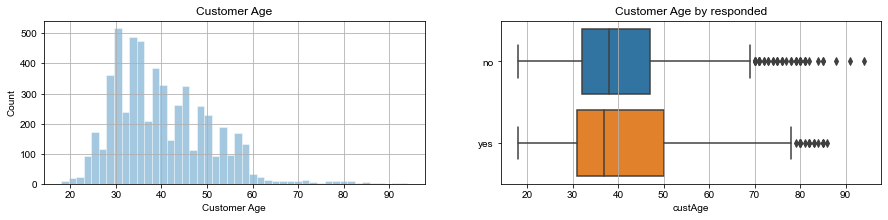

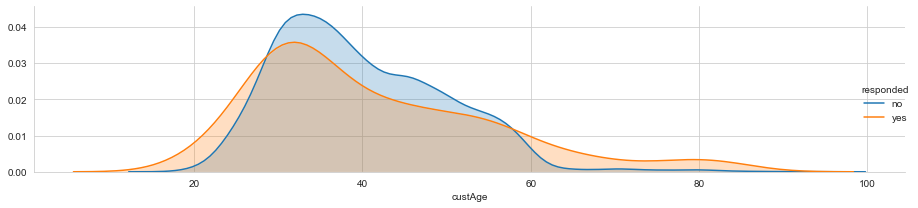

In [23]:
plot_var(df_train, 'custAge', 'Customer Age', continuous = True, log = False)

### profession

In [24]:
df_train.profession.value_counts()

admin.           1885
blue-collar      1665
technician       1212
services          719
management        536
retired           307
entrepreneur      275
self-employed     248
housemaid         187
unemployed        173
student           146
unknown            61
Name: profession, dtype: int64

In [25]:
responded_rate = df_train.groupby('profession')['responded'].value_counts(normalize =  True)[:,'yes'] \
#        .sort_values(ascending = False)

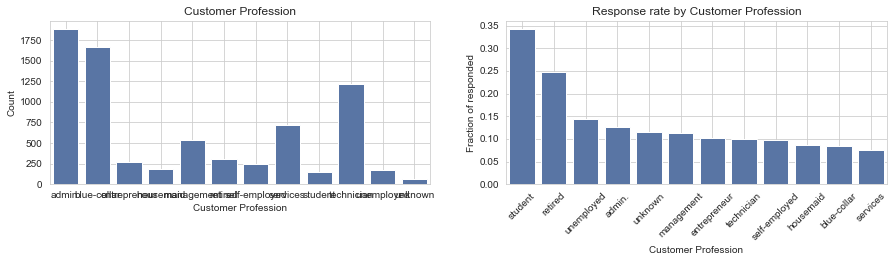

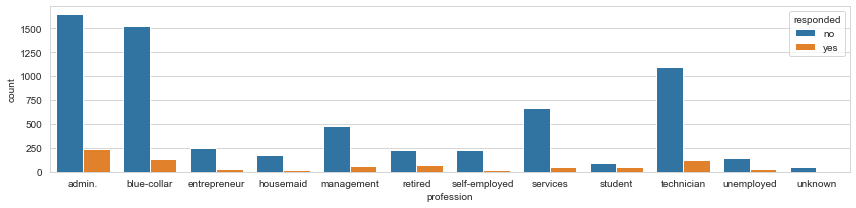

In [26]:
plot_var(df_train, 'profession', 'Customer Profession', continuous = False, log = False)

### marital

In [27]:
df_train.marital.value_counts()

married     4445
single      2118
divorced     843
unknown        8
Name: marital, dtype: int64

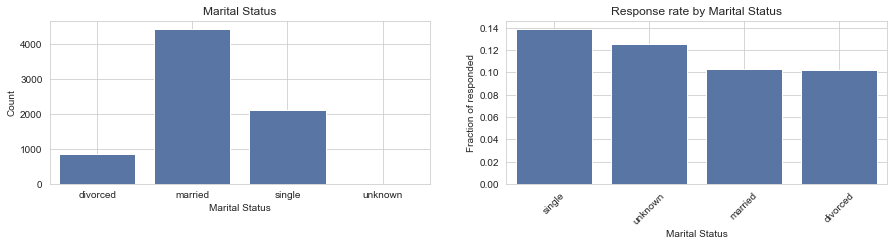

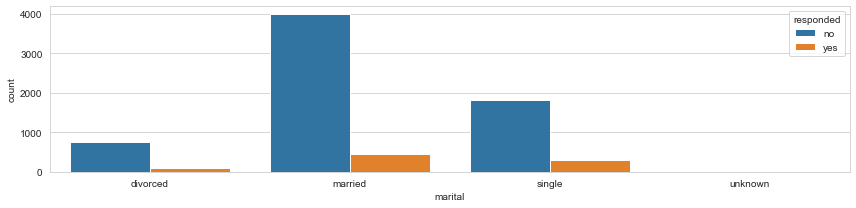

In [28]:
plot_var(df_train, 'marital', 'Marital Status', continuous = False, log = False)

### schooling

In [29]:
df_train.schooling.value_counts()

university.degree      1554
high.school            1216
basic.9y                784
professional.course     664
basic.4y                534
basic.6y                275
unknown                 231
illiterate                1
Name: schooling, dtype: int64

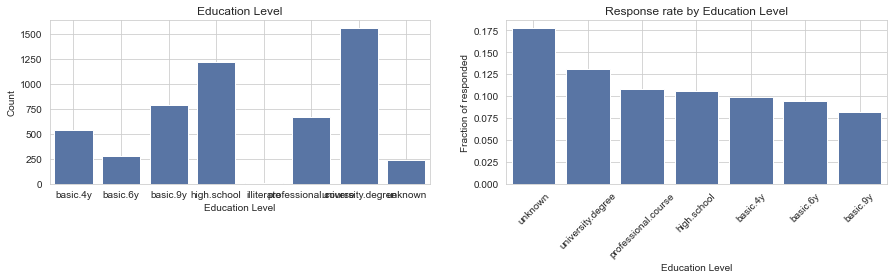

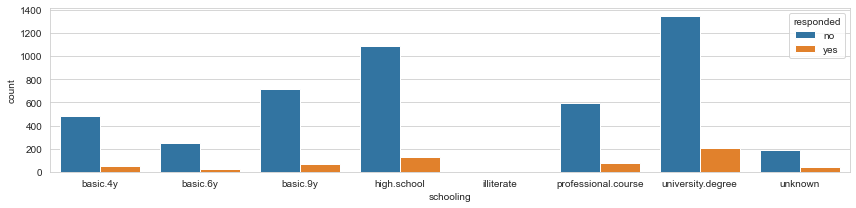

In [30]:
plot_var(df_train, 'schooling', 'Education Level', continuous = False, log = False)

### Default

In [31]:
df_train.default.value_counts()

no         5981
unknown    1432
yes           1
Name: default, dtype: int64

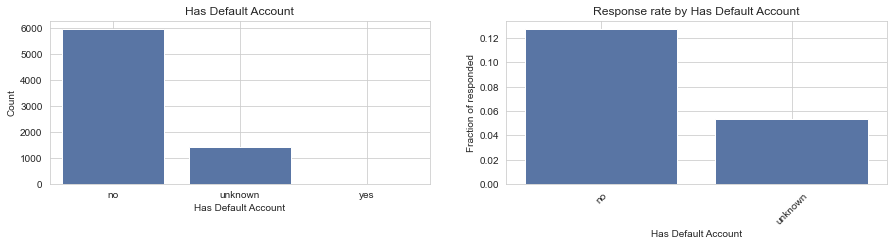

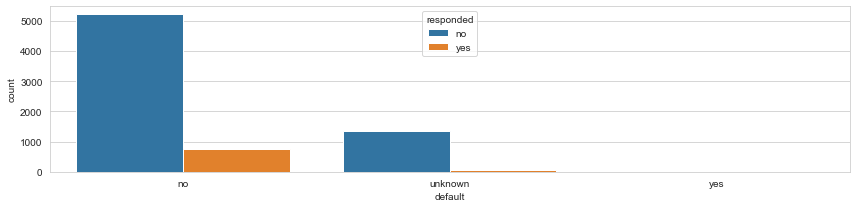

In [32]:
plot_var(df_train, 'default', 'Has Default Account', continuous = False, log = False)

### Housing

In [33]:
df_train.housing.value_counts()

yes        3840
no         3406
unknown     168
Name: housing, dtype: int64

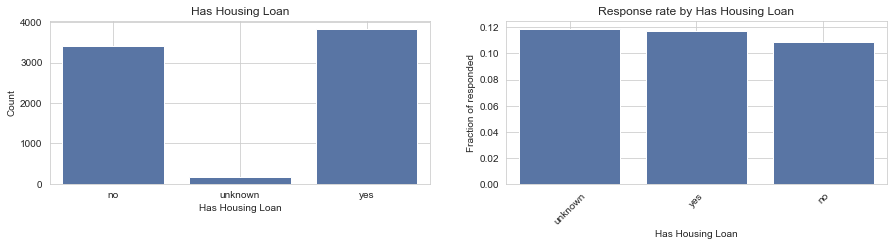

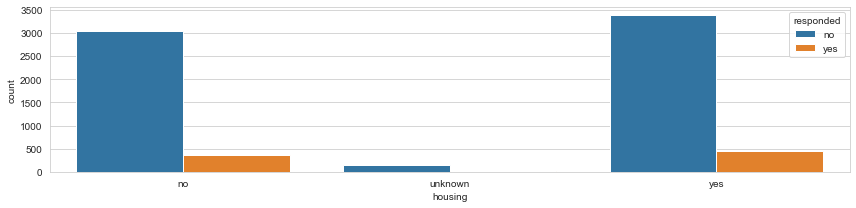

In [34]:
plot_var(df_train, 'housing', 'Has Housing Loan', continuous = False, log = False)

### Loan

In [35]:
df_train.loan.value_counts()

no         6099
yes        1147
unknown     168
Name: loan, dtype: int64

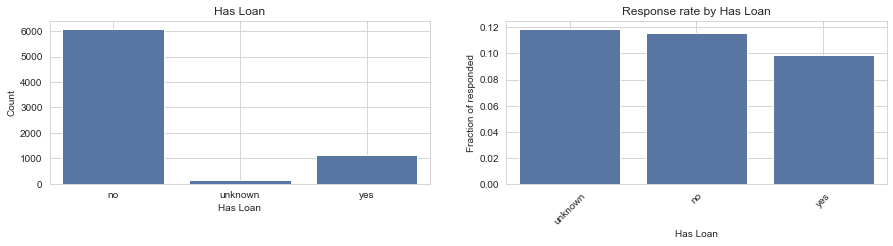

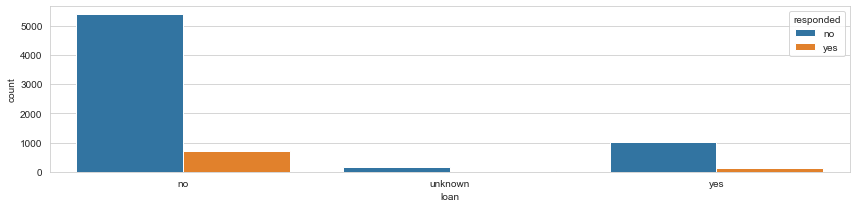

In [36]:
plot_var(df_train, 'loan', 'Has Loan', continuous = False, log = False)

### Comments on customer data:<br>
1. Due to the high dispersion of custAge, the relationship between age and customer response is not conclusive
2. The student and retired are the top 2 of highest response rate. 
3. Single people are slightly more likely to response. 
4. The relationship between other predictors of customer data and the target variable are not clear

### Contact

In [37]:
df_train.contact.value_counts()

cellular     4731
telephone    2683
Name: contact, dtype: int64

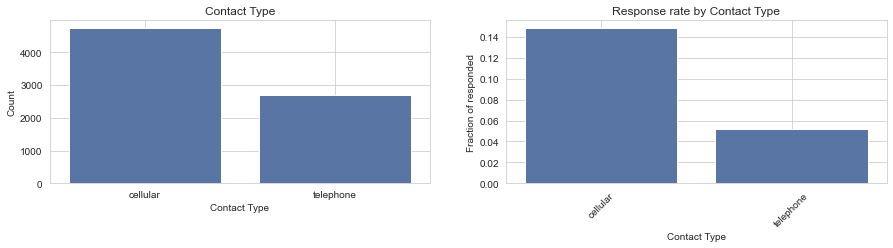

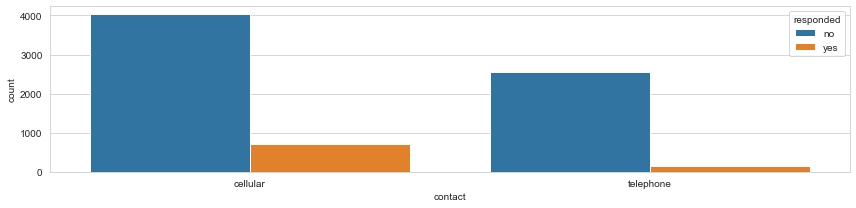

In [38]:
plot_var(df_train, 'contact', 'Contact Type', continuous = False, log = False)

### month

In [39]:
df_train.month.value_counts()

may    2529
jul    1229
aug    1112
jun     939
nov     741
apr     487
oct     145
sep     112
mar      93
dec      27
Name: month, dtype: int64

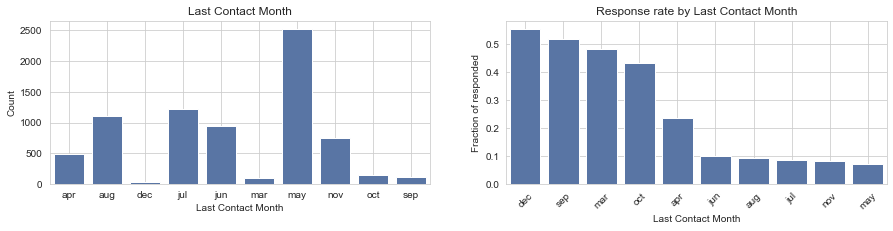

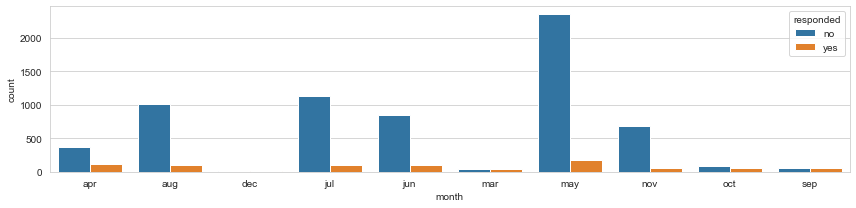

In [40]:
plot_var(df_train, 'month', 'Last Contact Month', continuous = False, log = False)

### Day_of_week

In [41]:
df_train.day_of_week.value_counts()

mon    1441
thu    1379
tue    1341
wed    1295
fri    1247
Name: day_of_week, dtype: int64

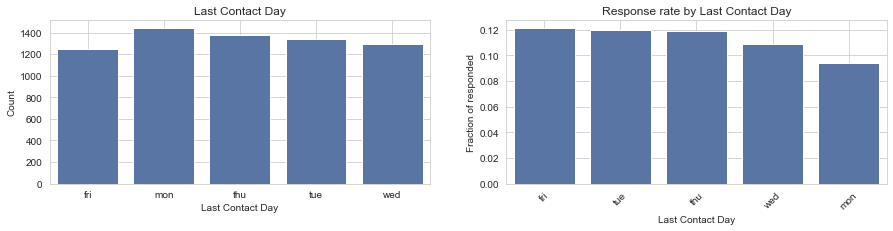

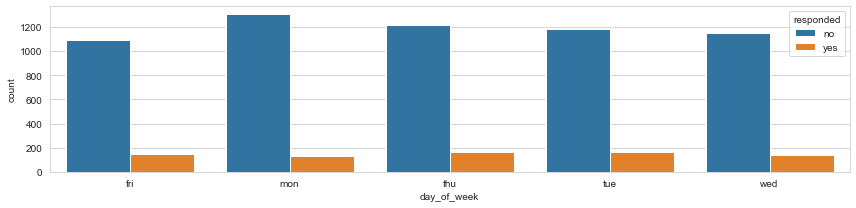

In [42]:
plot_var(df_train, 'day_of_week', 'Last Contact Day', continuous = False, log = False)

### Campaign

In [43]:
df_train.campaign.describe()

count    7414.000000
mean        2.518344
std         2.695055
min         1.000000
25%         1.000000
50%         2.000000
75%         3.000000
max        40.000000
Name: campaign, dtype: float64

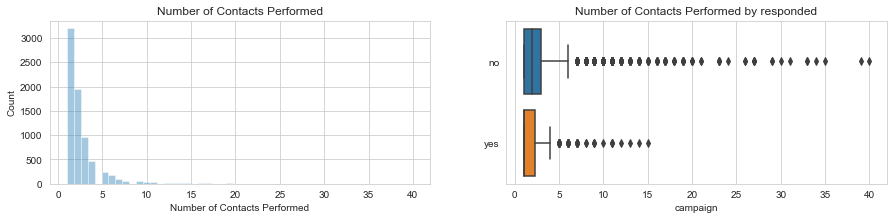

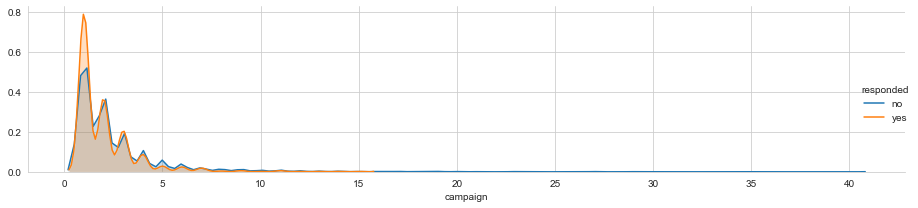

In [44]:
plot_var(df_train, 'campaign', 'Number of Contacts Performed', continuous = True, log = False)

### pdays

In [45]:
df_train.pdays[df_train.pdays == 999] = -1
df_test.pdays[df_test.pdays == 999] = -1

In [46]:
df_train.pdays.describe()

count    7414.000000
mean       -0.725384
std         1.537379
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max        22.000000
Name: pdays, dtype: float64

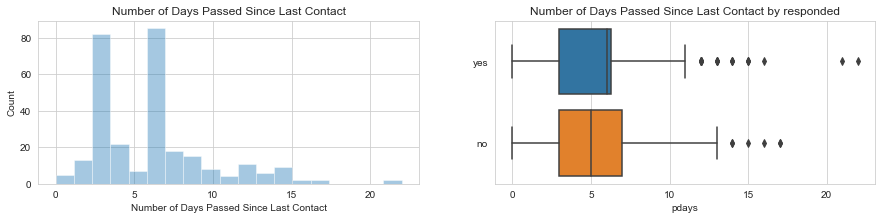

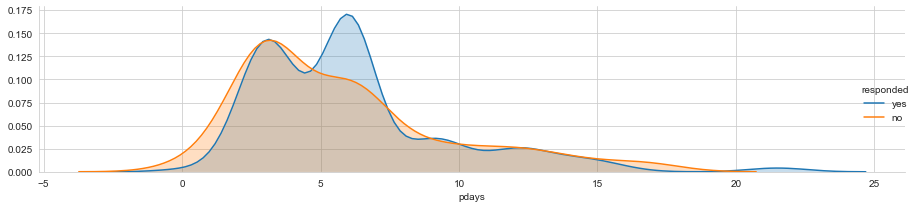

In [47]:
plot_var(df_train[df_train.pdays>=0], 'pdays', 'Number of Days Passed Since Last Contact', continuous = True, log = False)

In [48]:
### pmonths

In [49]:
df_train.pmonths[df_train.pmonths == 999] = -1
df_test.pmonths[df_test.pmonths == 999] = -1

In [50]:
df_train.pmonths.describe()

count    7414.000000
mean       -0.952904
std         0.234251
min        -1.000000
25%        -1.000000
50%        -1.000000
75%        -1.000000
max         0.733333
Name: pmonths, dtype: float64

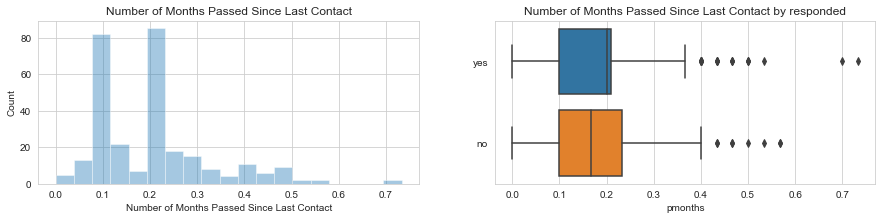

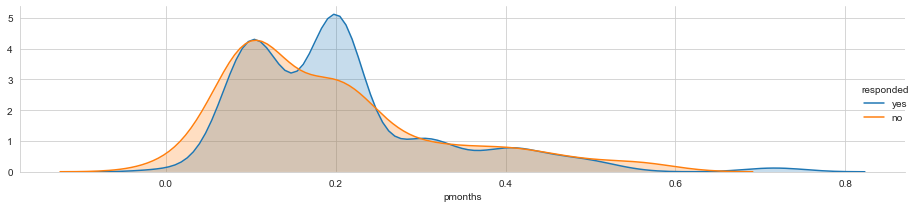

In [51]:
plot_var(df_train[df_train.pmonths>=0], 'pmonths', 'Number of Months Passed Since Last Contact', continuous = True, log = False)

### previous

In [52]:
df_train.previous.describe()

count    7414.000000
mean        0.184111
std         0.516775
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.000000
Name: previous, dtype: float64

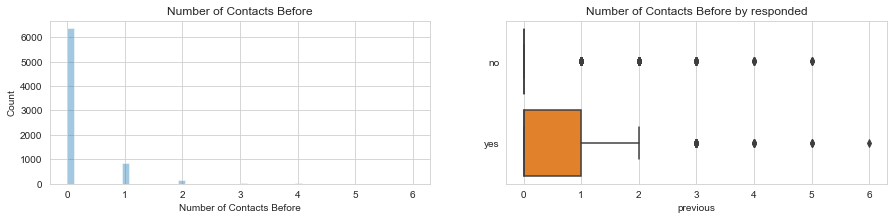

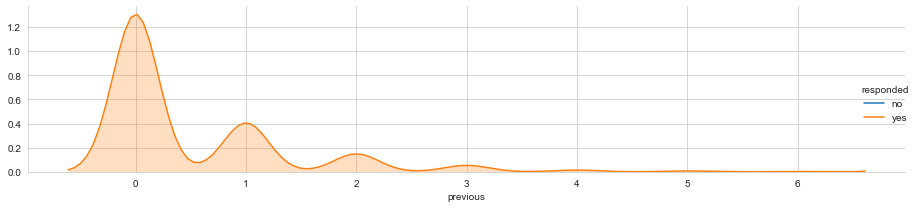

In [53]:
plot_var(df_train, 'previous', 'Number of Contacts Before', continuous = True, log = False)

### poutcome

In [54]:
df_train.poutcome.value_counts()

nonexistent    6350
failure         800
success         264
Name: poutcome, dtype: int64

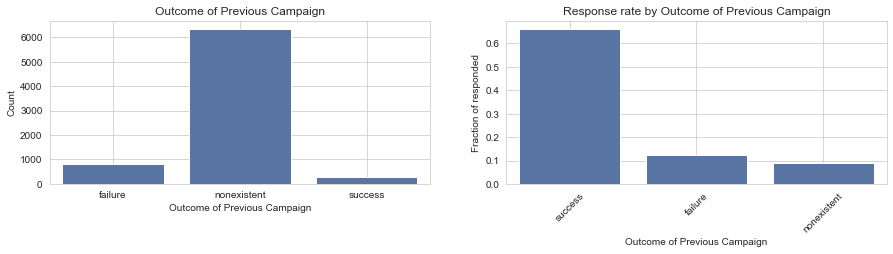

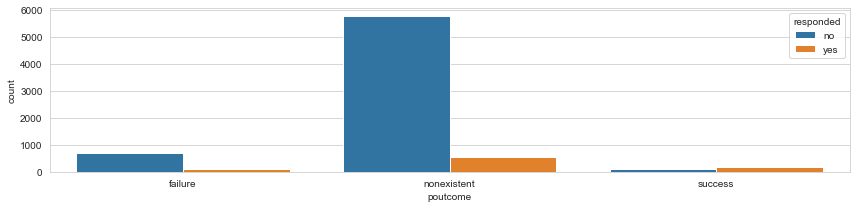

In [55]:
plot_var(df_train, 'poutcome', 'Outcome of Previous Campaign', continuous = False, log = False)

### pastemail

In [56]:
df_train.pastEmail.describe()

count    7414.000000
mean        0.361883
std         1.261668
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max        18.000000
Name: pastEmail, dtype: float64

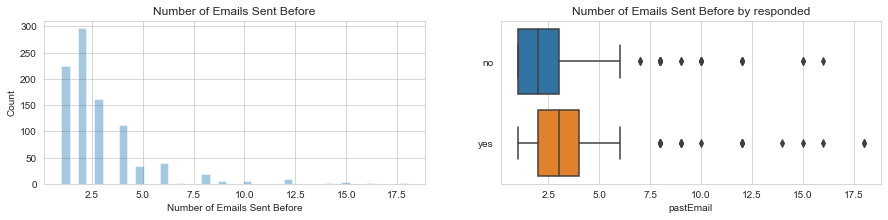

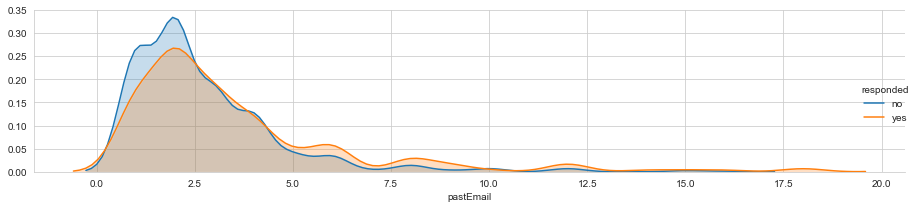

In [57]:
plot_var(df_train[df_train.pastEmail>0], 'pastEmail', 'Number of Emails Sent Before', continuous = True, log = False)

### Comments on bank activity data:<br>
1. People are more likely to response when contacted by cellular.
2. The timing of contacting customers also matters. Higher response rates were observed in December and on Friday.
3. People who previously responded the marketing campaign are more likely to response the current one, but the number of previously responded customer is a small fraction. 

### emp.var.rate

In [58]:
df_train['emp.var.rate'].describe()

count    7414.000000
mean        0.052091
std         1.568399
min        -3.400000
25%        -1.800000
50%         1.100000
75%         1.400000
max         1.400000
Name: emp.var.rate, dtype: float64

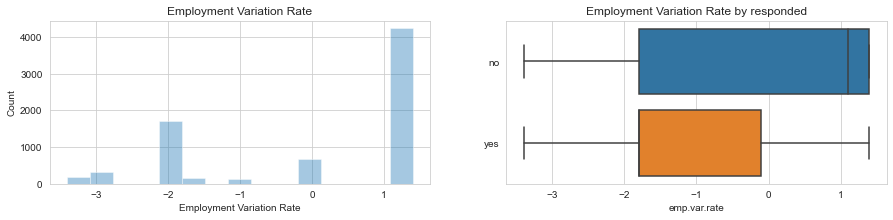

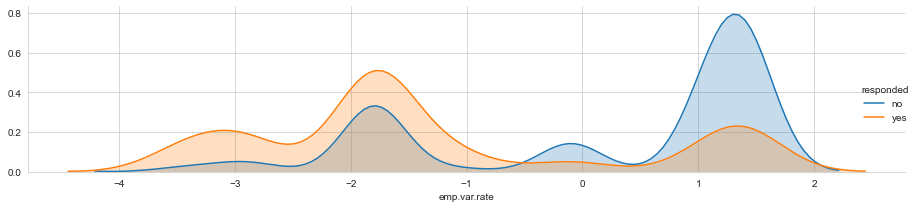

In [59]:
plot_var(df_train, 'emp.var.rate', 'Employment Variation Rate', continuous = True, log = False)

### cons.price.idx

In [60]:
df_train['cons.price.idx'].describe()

count    7414.000000
mean       93.570708
std         0.578345
min        92.201000
25%        93.075000
50%        93.444000
75%        93.994000
max        94.767000
Name: cons.price.idx, dtype: float64

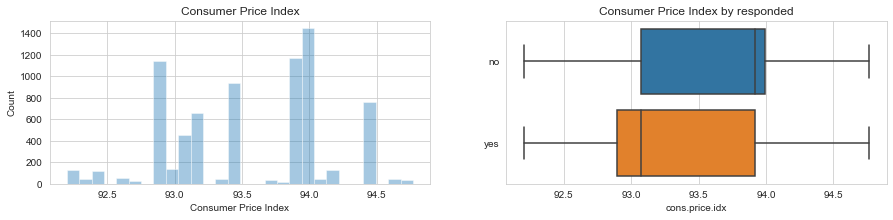

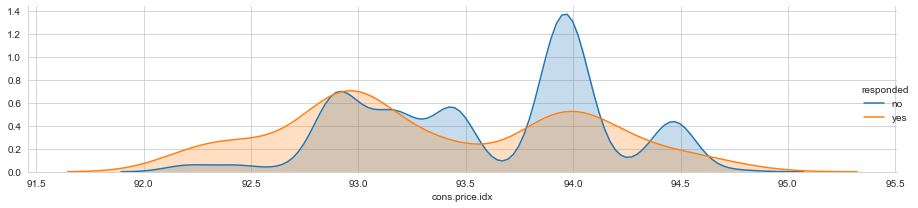

In [61]:
plot_var(df_train, 'cons.price.idx', 'Consumer Price Index', continuous = True, log = False)

### cons.conf.idx

In [62]:
df_train['cons.conf.idx'].describe()

count    7414.000000
mean      -40.561316
std         4.649800
min       -50.800000
25%       -42.700000
50%       -41.800000
75%       -36.400000
max       -26.900000
Name: cons.conf.idx, dtype: float64

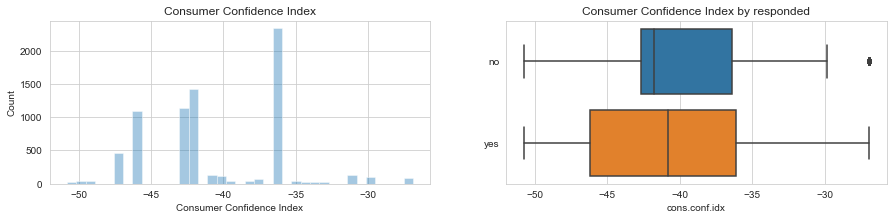

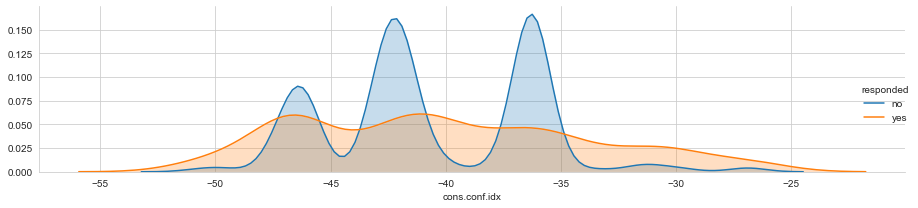

In [63]:
plot_var(df_train, 'cons.conf.idx', 'Consumer Confidence Index', continuous = True, log = False)

### euribor3m

In [64]:
df_train['euribor3m'].describe()

count    7414.000000
mean        3.583141
std         1.744865
min         0.634000
25%         1.334000
50%         4.857000
75%         4.961000
max         5.045000
Name: euribor3m, dtype: float64

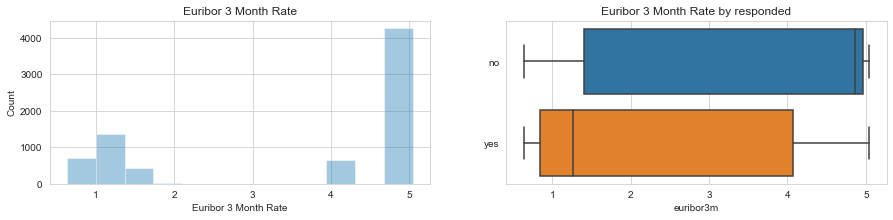

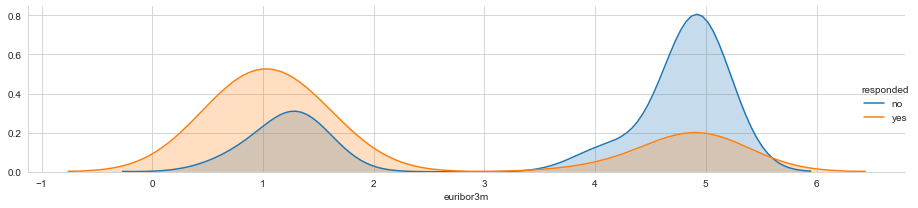

In [65]:
plot_var(df_train, 'euribor3m', 'Euribor 3 Month Rate', continuous = True, log = False)

### nr.employed

In [66]:
df_train['nr.employed'].describe()

count    7414.000000
mean     5165.224251
std        73.108669
min      4963.600000
25%      5099.100000
50%      5191.000000
75%      5228.100000
max      5228.100000
Name: nr.employed, dtype: float64

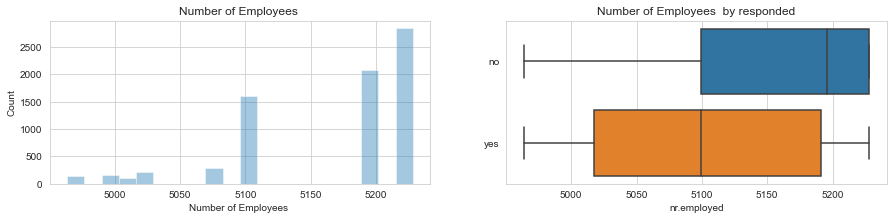

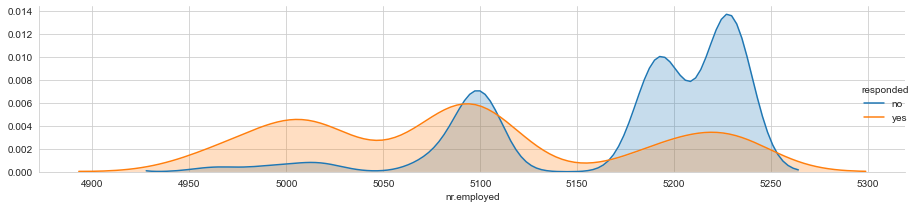

In [67]:
plot_var(df_train, 'nr.employed', 'Number of Employees ', continuous = True, log = False)

### Comments on social and economic data:<br>
1. Customer are more likely to response to insurance market campaign when the market is down or economic is in the down turn.


# 3. Feature Selection and Engineering

## A. Feature correlation

In [68]:
num_feature_list = df_train.select_dtypes(exclude=['object']).columns

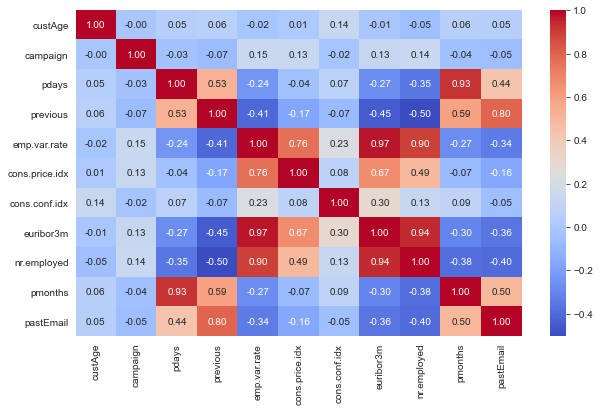

In [69]:
fig, ax = plt.subplots(figsize = (10,6))
cm_df = sns.heatmap(df_train[num_feature_list].corr(), annot = True, fmt = ".2f", cmap = 'coolwarm', ax = ax)

### Feature correlation comments:
We found highly correlated features (correlation coefficient > 0.9):
1. pdays and pmonths <br/>
2. emp.var.rate and euribor3m <br/>
3. euribor3m and nr.employed <br/>

Thus, we are going to drop "pmomths", "emp.var.rate", "nr.employed" from the predictor features in order to get more stable models.



In [70]:
drop_cols = ["pmonths", "emp.var.rate", "nr.employed"]
df_train_drop = df_train.drop(columns = drop_cols)
df_test_drop = df_test.drop(columns = drop_cols)
df_train_feature = df_train_drop.drop(columns = ['responded'])
df_test_feature = df_test_drop.drop(columns = ['Unnamed: 0'])

## B. Impute missing data
For the numerical features, the missing value is replaced by the median.<br>
For the categorical features, the missing value is treated as unknown.

In [71]:
missing_value_table(df_train_feature)

Your selected dataframe has 18 columns.
There are 3 columns that have missing values.


,Missing Values,% of Total Values,Type
schooling,2155,29.1,object
custAge,1804,24.3,float64
day_of_week,711,9.6,object


In [72]:
num_feature_list = df_train_feature.select_dtypes(exclude=['object']).columns
num_feature_list

Index(['custAge', 'campaign', 'pdays', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'pastEmail'],
      dtype='object')

In [73]:
imputer = SimpleImputer(strategy = 'median')
imputer.fit(df_train_feature[num_feature_list])
df_train_feature[num_feature_list] = pd.DataFrame(imputer.transform(df_train_feature[num_feature_list]), columns = num_feature_list)
df_test_feature[num_feature_list] = pd.DataFrame(imputer.transform(df_test_feature[num_feature_list]), columns = num_feature_list)

In [74]:
df_train_feature.head()

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,campaign,pdays,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,pastEmail
0,55.0,admin.,single,university.degree,unknown,no,no,cellular,nov,mon,1.0,-1.0,0.0,nonexistent,93.200,-42.0,4.191,0.0
1,38.0,blue-collar,married,NaN,no,no,no,cellular,jul,mon,1.0,-1.0,0.0,nonexistent,93.918,-42.7,4.960,0.0
2,42.0,technician,married,high.school,no,no,no,telephone,may,mon,1.0,-1.0,0.0,nonexistent,93.994,-36.4,4.857,0.0
3,55.0,management,divorced,NaN,unknown,yes,yes,cellular,jul,wed,2.0,-1.0,0.0,nonexistent,93.918,-42.7,4.962,0.0
4,38.0,admin.,divorced,university.degree,no,yes,no,cellular,may,tue,5.0,-1.0,1.0,failure,92.893,-46.2,1.291,1.0


In [75]:
cat_feature_list = df_train_feature.select_dtypes(include=['object']).columns

In [76]:
imputer = SimpleImputer(strategy = 'constant')
imputer.fit(df_train_feature[cat_feature_list])
df_train_feature[cat_feature_list] = pd.DataFrame(imputer.transform(df_train_feature[cat_feature_list]), columns = cat_feature_list)
df_test_feature[cat_feature_list] = pd.DataFrame(imputer.transform(df_test_feature[cat_feature_list]), columns = cat_feature_list)

In [77]:
missing_value_table(df_train_feature)

Your selected dataframe has 18 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values,Type


## C. Feature Engineering
The training and test dataset were combined to perform one-hot-encoding to make sure the features are consistent after the transformation.

In [78]:
dummy_list = df_train_feature.select_dtypes(include=['object']).columns
dummy_list

Index(['profession', 'marital', 'schooling', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'poutcome'],
      dtype='object')

In [79]:
df_train_feature['train'] = 'yes'
df_test_feature['train'] = 'no'

In [80]:
df_cmb = pd.concat((df_train_feature, df_test_feature), axis = 0)
df_cmb.shape

(8238, 19)

In [81]:
print(df_cmb.shape)
for f in dummy_list:
    dummy_df = pd.get_dummies(df_cmb[f], prefix = f)
    df_cmb = df_cmb.drop([f], axis=1)
    df_cmb = pd.concat((df_cmb, dummy_df), axis = 1)
print(df_cmb.shape)

(8238, 19)
(8238, 64)


In [82]:
df_train_feature = df_cmb[df_cmb.train == 'yes']
df_test_feature = df_cmb[df_cmb.train == 'no']
df_train_feature = df_train_feature.drop(columns = ['train'])
df_test_feature = df_test_feature.drop(columns = ['train'])
print(df_train_feature.shape, df_test_feature.shape)

(7414, 63) (824, 63)


In [83]:
df_train_feature.head()

,custAge,campaign,pdays,previous,cons.price.idx,cons.conf.idx,euribor3m,pastEmail,profession_admin.,profession_blue-collar,...,month_sep,day_of_week_fri,day_of_week_missing_value,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
0,55.0,1.0,-1.0,0.0,93.200,-42.0,4.191,0.0,1,0,...,0,0,0,1,0,0,0,0,1,0
1,38.0,1.0,-1.0,0.0,93.918,-42.7,4.960,0.0,0,1,...,0,0,0,1,0,0,0,0,1,0
2,42.0,1.0,-1.0,0.0,93.994,-36.4,4.857,0.0,0,0,...,0,0,0,1,0,0,0,0,1,0
3,55.0,2.0,-1.0,0.0,93.918,-42.7,4.962,0.0,0,0,...,0,0,0,0,0,0,1,0,1,0
4,38.0,5.0,-1.0,1.0,92.893,-46.2,1.291,1.0,1,0,...,0,0,0,0,0,1,0,1,0,0


## D. Feature Scaling 

In [84]:
#minmax scaler was used to scale the dataset
scaler = MinMaxScaler()
scaler.fit(df_train_feature)

MinMaxScaler()

In [85]:
df_train_feature_scl = pd.DataFrame(scaler.transform(df_train_feature), columns=df_train_feature.columns)
df_test_feature_scl = pd.DataFrame(scaler.transform(df_test_feature), columns=df_test_feature.columns)

## E. Train/Test Data Split

In [86]:
train_target = df_train['responded']

In [173]:
target = {'yes':1,
         'no':0}
train_target = train_target.map(target)

In [174]:
# 20% of the training dataset were used as the validation dataset to evaluate the model
X_train, X_val, y_train, y_val = train_test_split(df_train_feature_scl, train_target, test_size=0.2, random_state=42)

## F. Oversampling

In [88]:
Counter(y_train)

Counter({'no': 5291, 'yes': 640})

In [89]:
# The ratio of target value 0 to target value 1 is about 8. 
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [90]:
# the sample numbers of arget value 0 and target value 1 are now the same.
Counter(y_train)

Counter({'no': 5291, 'yes': 5291})

# 5. Modeling

### A. Logistic regression with SGD

In [197]:
pipeline_sgdlr = Pipeline([
    ('model', SGDClassifier(loss='log', max_iter=1000, tol=1e-3, random_state=101, warm_start=False))
])
param_grid_sgdlr  = {
    'model__alpha': [10**-5, 10**-1, 10**2],
    'model__penalty': ['l1', 'l2']
}

In [198]:
kfold = 5
grid_sgdlr = GridSearchCV(estimator=pipeline_sgdlr, param_grid=param_grid_sgdlr, \
                          scoring='roc_auc', n_jobs=-1, pre_dispatch='2*n_jobs', cv=kfold, verbose=1, return_train_score=False)

In [199]:
grid_sgdlr.fit(X_train,y_train)

clf_sgdlr_gs = grid_sgdlr.best_estimator_
print('Best score: ', grid_sgdlr.best_score_)
print('Best parameter set: \n', grid_sgdlr.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    7.1s finished


Best score:  0.7776914572980093
Best parameter set: 
 {'model__alpha': 1e-05, 'model__penalty': 'l1'}


In [200]:
pred_sgdlr_gs_train =  clf_sgdlr_gs.predict_proba(X_train)[:,1]
auc_sgdlr_gs_train = roc_auc_score(y_train, pred_sgdlr_gs_train)
print('The AUC score of the training dataset is %s' %(auc_sgdlr_gs_train))

The AUC score of the training dataset is 0.7913403952466452


In [201]:
pred_sgdlr_gs_val =  clf_sgdlr_gs.predict_proba(X_val)[:,1]
auc_sgdlr_gs_val = roc_auc_score(y_val, pred_sgdlr_gs_val)
print('The AUC score of the validation dataset is %s'%(auc_sgdlr_gs_val))

The AUC score of the validation dataset is 0.7947038191738114


### B. random forest

In [97]:
clf_rf = RandomForestClassifier(n_jobs = -1, random_state = 102, max_features = 'sqrt')

In [246]:
#grid search
param_grid_rf = {
    'n_estimators':[200, 500, 1000],
    'criterion':['gini', 'entropy'],
    'max_depth':[3, 5, 10],
    'min_samples_split':[2,4]
}

In [247]:
grid_rf = GridSearchCV(estimator = clf_rf, param_grid = param_grid_rf, scoring = 'roc_auc', n_jobs = -1, pre_dispatch = '2*n_jobs', cv = kfold, verbose=1, return_train_score = True)

In [248]:
grid_rf.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   33.1s
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  3.1min finished


GridSearchCV(cv=5,
             estimator=RandomForestClassifier(max_features='sqrt', n_jobs=-1,
                                              random_state=102),
             n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10], 'min_samples_split': [2, 4],
                         'n_estimators': [200, 500, 1000]},
             return_train_score=True, scoring='roc_auc', verbose=1)

In [ ]:
grid_rf.best_params_

In [250]:
#use the best_params_ from the grid search
clf_rf2 = RandomForestClassifier(n_jobs = -1, random_state = 102, max_features = 'sqrt', criterion = 'gini', \
                                max_depth = 10, min_samples_split= 2, n_estimators = 1000)

In [251]:
start = time.time()
print('training...')
clf_rf2.fit(X_train,y_train)
print('training finishied in %d seconds...' % (time.time()-start))

training...
training finishied in 4 seconds...


In [252]:
pred_rf2_train =  clf_rf2.predict_proba(X_train)[:,1]
auc_rf2_train = roc_auc_score(y_train, pred_rf2_train)
print('The AUC score of the training dataset is %s'%(auc_rf2_train))

The AUC score of the training dataset is 0.9173333845208845


In [253]:
pred_rf2_val =  clf_rf2.predict_proba(X_val)[:,1]
auc_rf2_val = roc_auc_score(y_val, pred_rf2_val)
print('The AUC score of the training dataset is %s'%(auc_rf2_val))

The AUC score of the training dataset is 0.8011243180046764


### C. XGboost

In [254]:
space ={
        'n_estimators' : hp.choice('n_estimators', np.arange(800, 1500, 100, dtype=int)),
        'learning_rate': hp.quniform('learning_rate', 0.01, 0.3, 0.01),
        'max_depth': hp.choice("max_depth", np.arange(1, 3, 1, dtype=int)),
        'min_child_weight' : hp.choice("min_child_weight", np.arange(2, 6, 2, dtype=int)),
        'subsample': hp.quniform('subsample', 0.7, 1.0, 0.1),
        'colsample_bytree': hp.quniform('colsample_bytree', 0.5, 1.0, 0.1),
    }

In [255]:
def objective(space):

    classifier = xgb.XGBClassifier(n_estimators = int(space['n_estimators']),
                            max_depth = int(space['max_depth']),
                            learning_rate = space['learning_rate'],
                            min_child_weight = space['min_child_weight'],
                            subsample = space['subsample'],
                            colsample_bytree = space['colsample_bytree'],
                            tree_method='gpu_hist', gpu_id=0, nthread=-1)
    # Applying k-Fold Cross Validation   
    scores = cross_val_score(estimator = classifier, X = X_train, y = y_train, scoring = 'roc_auc', cv = 3)
    CrossValMean = scores.mean()

    print("CrossValMean:", CrossValMean)

    return{'loss':1-CrossValMean, 'status': STATUS_OK }


In [ ]:
trials = Trials()
best = fmin(fn=objective,
            space=space,
            algo=tpe.suggest,
            max_evals=100,
            return_argmin=False,
            trials=trials)

print("Best: ", best)

In [257]:
# use the best parameters trained from hyperopt
clf_gbt = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0, nthread=-1, learning_rate = 0.06, \
                            n_estimators=1300, max_depth=2, colsample_bytree = 1, subsample = 0.7, min_child_weight=4)
start = time.time()
print('training...')
clf_gbt.fit(X_train,y_train)
print('training finishied in %d seconds...' % (time.time()-start))

training...
training finishied in 1 seconds...


In [258]:
pred_gbt_train =  clf_gbt.predict_proba(X_train)[:,1]
print('The AUC score of the training dataset is %s'%(auc_gbt_train))

The AUC score of the training dataset is 0.9850650557511265


In [259]:
pred_gbt_val =  clf_gbt.predict_proba(X_val)[:,1]
auc_gbt_val = roc_auc_score(y_val, pred_gbt_val)
print('The AUC score of the training dataset is %s'%(auc_gbt_val))

The AUC score of the training dataset is 0.8111983632112236


# 6. Model Selection

In [165]:
models = pd.DataFrame({
                'Models': ['Logistic Regression','Random Forest Classifier', 'XGBoost'],
                'Score':  [auc_sgdlr_gs_val,auc_rf2_val,auc_gbt_val]})

models.sort_values(by='Score', ascending=False)

,Models,Score
2,XGBoost,0.806198
1,Random Forest Classifier,0.798007
0,Logistic Regression,0.776867


The trained models are ranked by the ROC AUC scores based on the validation data, and the best performance is from XGboost.

In [187]:
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_val, pred_sgdlr_gs_val)
len(fprlog)

298

In [188]:
len(tprlog)

298

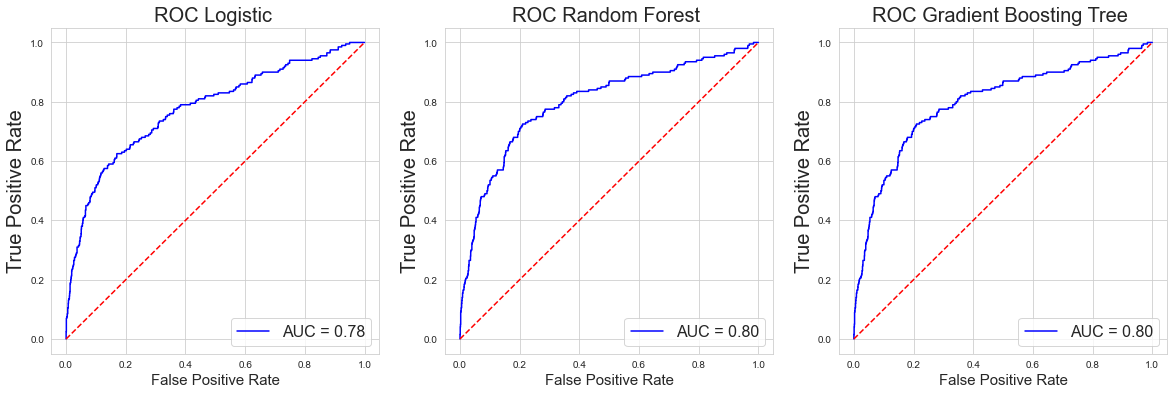

In [190]:
#Let's plot the ROC curves for the three trained model
fig, ax_arr = plt.subplots(nrows = 1, ncols = 3, figsize = (20,6))
# logistic regression
fprlog, tprlog, thresholdlog = metrics.roc_curve(y_val, pred_sgdlr_gs_val)
roc_auclog = metrics.auc(fprlog, tprlog)

ax_arr[0].plot(fprlog, tprlog, 'b', label = 'AUC = %0.2f' % roc_auclog)
ax_arr[0].plot([0, 1], [0, 1],'r--')
ax_arr[0].set_title('ROC Logistic ',fontsize=20)
ax_arr[0].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[0].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[0].legend(loc = 'lower right', prop={'size': 16})

#random forest
fprrfc, tprrfc, thresholdrfc = metrics.roc_curve(y_val, pred_rf2_val)
roc_aucrfc = metrics.auc(fprrfc, tprrfc)

ax_arr[1].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[1].plot([0, 1], [0, 1],'r--')
ax_arr[1].set_title('ROC Random Forest ',fontsize=20)
ax_arr[1].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[1].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[1].legend(loc = 'lower right', prop={'size': 16})

fprgbt, tprgbt, thresholdgbt = metrics.roc_curve(y_val, pred_gbt_val)
roc_aucgbt = metrics.auc(fprgbt, tprgbt)

ax_arr[2].plot(fprrfc, tprrfc, 'b', label = 'AUC = %0.2f' % roc_aucrfc)
ax_arr[2].plot([0, 1], [0, 1],'r--')
ax_arr[2].set_title('ROC Gradient Boosting Tree ',fontsize=20)
ax_arr[2].set_ylabel('True Positive Rate',fontsize=20)
ax_arr[2].set_xlabel('False Positive Rate',fontsize=15)
ax_arr[2].legend(loc = 'lower right', prop={'size': 16})

### Analyzing the result
Now, we have to decide which model is the best model, and we have two types of wrong values:<br>
1. False positive, means the customers did not response to the campaign, but the model thinks they did
2. False negative, means the customer did response to the campaign, but the model thinks they did not

I think the second is most harmful, because we may miss the target customers who are most likely to buy the insurance in the feature campaign. The first error is ok, since the worst thing is to spend some extra money, but we won't loose potential customers.


In [203]:
pred_sgdlr_gs_val = clf_sgdlr_gs.predict(X_val)

In [204]:
print('Logistic Regression Confusion Matrix\n', confusion_matrix(y_val, pred_sgdlr_gs_val))

Logistic Regression Confusion Matrix
 [[1277    6]
 [ 179   21]]


In [205]:
print('Logistic Regression Reports\n',classification_report(y_val, pred_sgdlr_gs_val))

Logistic Regression Reports
               precision    recall  f1-score   support

           0       0.88      1.00      0.93      1283
           1       0.78      0.10      0.19       200

    accuracy                           0.88      1483
   macro avg       0.83      0.55      0.56      1483
weighted avg       0.86      0.88      0.83      1483



In [215]:
pred_rf2_val =  clf_rf2.predict(X_val)

In [216]:
print('Random Forest Confusion Matrix\n', confusion_matrix(y_val, pred_rf2_val))

Random Forest Confusion Matrix
 [[1267   16]
 [ 161   39]]


In [217]:
print('Random Forest Reports\n',classification_report(y_val, pred_rf2_val))

Random Forest Reports
               precision    recall  f1-score   support

           0       0.89      0.99      0.93      1283
           1       0.71      0.20      0.31       200

    accuracy                           0.88      1483
   macro avg       0.80      0.59      0.62      1483
weighted avg       0.86      0.88      0.85      1483



In [221]:
pred_gbt_val =  clf_gbt.predict(X_val)

In [222]:
print('Gradient Boosting Tree Confusion Matrix\n', confusion_matrix(y_val, pred_gbt_val))

Gradient Boosting Tree Confusion Matrix
 [[1261   22]
 [ 155   45]]


In [223]:
print('Gradient Boosting Tree Reports\n',classification_report(y_val, pred_gbt_val))

Gradient Boosting Tree Reports
               precision    recall  f1-score   support

           0       0.89      0.98      0.93      1283
           1       0.67      0.23      0.34       200

    accuracy                           0.88      1483
   macro avg       0.78      0.60      0.64      1483
weighted avg       0.86      0.88      0.85      1483



### Top important factors

In [262]:
feature_importances_gbt = pd.DataFrame(clf_gbt.feature_importances_,
                                     index = X_train.columns,
                                     columns = ['importance']).sort_values('importance',ascending=False)
print("Features sorted by their score: Top 10")
feature_importances_gbt.head(10)

Features sorted by their score: Top 10


,importance
poutcome_success,0.111764
pdays,0.046708
euribor3m,0.034928
poutcome_failure,0.034255
month_may,0.029982
contact_cellular,0.021900
month_apr,0.021275
profession_retired,0.019723
cons.conf.idx,0.019067
schooling_unknown,0.018862


### Comment on model selection:
The random forest and gradient boosting tree models average performance was similar with ROC AUC score near **0.8**, but on the class responded with 'Yes' value, the gradient boosting tree model is slightly better. In the three models, the model performance was not so great in class responded with 'Yes'. The best recall score is only **0.23**, which means only 23% potential customers were correctly predicted, even though the weighted average recall is 0.88. There's still some potential to fine tune the model to increase the prediction result in class 'Yes'.
The top important factors of predicting customer response are also identified based on the importance analysis. The strong indicators of the customer response are: **previous campaign outcome, previous contact, macro economic, campaign month, and contact type**.

# 7. Prediction

In [225]:
df_train_feature_scl, train_target = oversample.fit_resample(df_train_feature_scl, train_target)

In [226]:
Counter(train_target)

Counter({0: 6574, 1: 6574})

In [227]:
clf_gbt_final = xgb.XGBClassifier(tree_method='gpu_hist', gpu_id=0, nthread=-1, learning_rate = 0.06, \
                            n_estimators=1300, max_depth=2, colsample_bytree = 1, subsample = 0.7, min_child_weight=4)
start = time.time()
print('training...')
clf_gbt_final.fit(df_train_feature_scl, train_target)
print('training finishied in %d seconds...' % (time.time()-start))

training...
training finishied in 2 seconds...


In [240]:
pred =  clf_gbt_final.predict(df_test_feature_scl)

In [242]:
pred = pd.DataFrame(pred, columns=['prediction'])

In [243]:
result = pd.concat((df_test['Unnamed: 0'], pred), axis = 1)

In [263]:
#save the result to csv
result.to_csv('result_hugo_20200908.csv')

# 8. Future Work
The assignment was intended to build a model that can be used to create some useful result rather than to obtain the best model. In order to improve the prediction results, some experiments are worth testing:
1. Feature engineering to extract useful information from current predictors. 
2. Test class weight parameters to improve the results on class responded "Yes".
3. Other models can also be tested, for example Neural network.